In [211]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate , learning_curve
from sklearn.metrics import confusion_matrix , roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
  
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , StackingClassifier , GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from imblearn.over_sampling import SMOTE 



np.warnings.filterwarnings('ignore')

In [212]:
df = pd.read_csv("clean_train.csv")

In [213]:
df_test =  pd.read_csv("clean_test.csv")

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         480 non-null    int64  
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 48.9+ KB


In [215]:
df_test

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
4,5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,361,LP002969,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
285,362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
286,363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
287,365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [216]:
#let's drop the column that was created during export 
df = df.drop("Unnamed: 0" , axis=1)

In [217]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [218]:
#i am using LabelEncoder on the column that have text and on Dependents because it had a 3+ that couldn't be read this will transform the column in 0 , 1 ect..
#i am not using onehot because it would do it on all the dataset which we don't wan't 
#get_dummies would create to much column that would be hard to deal with 
categ = ["Gender" , "Dependents",  "Married" , "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


In [219]:
X = df.drop(["Loan_Status"] , axis=1)
#let's define x = all the dataset except the target

In [220]:
y = df.Loan_Status
#y = Loan_status the prediction to know if your loan is accepted

In [221]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=42 , test_size=0.2)
#i am separating my dataset with a test size of 20/80

In [222]:
X_train.shape

(384, 11)

In [223]:
y_test.shape

(96,)

In [224]:
preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())]) 

preprocessing_mms = Pipeline(steps=[ 
   ('Minmax',MinMaxScaler())])

preprocessing_sm = SMOTE( sampling_strategy='auto')

#the dataset is really umbalanced so i ill need the smote to compare once i found a decent model 
#standard scaler and min max scaler will be for the other models

In [225]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


# Baseline model = DummyClassifier + StandardScaller + MinMaxScaler 

In [228]:
pipeline_DC = Pipeline(steps = [['preprocessing_Standard_scaler'  , preprocessing_ss],
                
                                ['classifier', DummyClassifier(strategy="uniform")]
                                     ])
                                     

In [229]:
pipeline_DC.fit(X_train , y_train)

Pipeline(steps=[('preprocessing_Standard_scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ['classifier', DummyClassifier(strategy='uniform')]])

In [230]:
print("accuracy train : %.3f"%pipeline_DC.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_DC.score(X_test , y_test))
#the result or pretty low but this is normal because i a using a dummy classiffier

accuracy train : 0.492
accuracy test : 0.479


In [231]:
y_pred_DCS = pipeline_DC.predict(X_test)
y_pred_DCS

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0])

In [232]:
print(classification_report(y_test, y_pred_DCS))
#we are going to base or result on the recall we will need the 0 to be really low and the 1 to be really high
#this is because in a bank you don't wan't to predict people like that : they can get a loan but actually they shouldn't be able to get it
#0 is the number of people that or not getting it but if the score is high this means a lot of people that shouldn't get the loan will get it 
#1 needs to be high because they are the good prediction of people who can correctly get the loan

              precision    recall  f1-score   support

           0       0.31      0.54      0.39        28
           1       0.73      0.51      0.60        68

    accuracy                           0.52        96
   macro avg       0.52      0.53      0.50        96
weighted avg       0.61      0.52      0.54        96



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

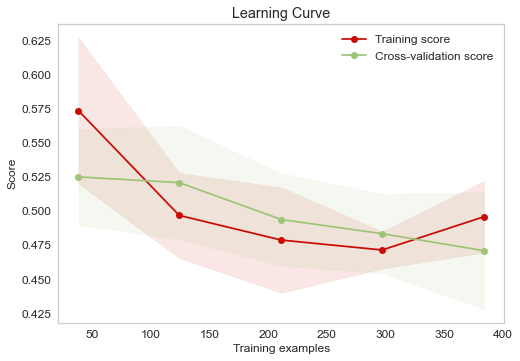

In [233]:
plot_learning_curve(pipeline_DCS, X , y)
#this learning curve is awfull it's really bad the training score keeps going down even when we think it's getting better and the test goes p in the end but it's not great

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

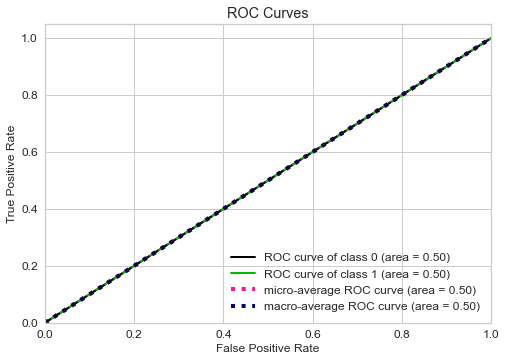

In [260]:
pipeline_DCS.fit(X_train, y_train)
y_probas = pipeline_DCS.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
#it's bad sense we can't see the lignes going up 

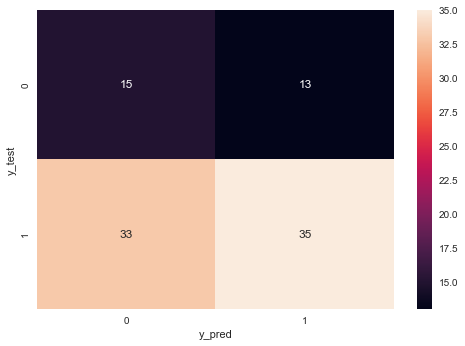

In [234]:
cm = confusion_matrix(y_test, y_pred_DCS)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
#what we need to reduce is the false positive on the top right overwhise it's decent but not great

# First iteration = Logistic Regression + Smote 

In [235]:
pipeline_LR= imbpipeline(steps = [['smote', preprocessing_sm],
                                    ['classiffier', LogisticRegression()]
                                     ])
# we are using smote because the data is umbalanced

In [236]:
pipeline_LR.fit(X_train , y_train)

Pipeline(steps=[('smote', SMOTE()), ['classiffier', LogisticRegression()]])

In [237]:
print("accuracy train : %.3f"%pipeline_LR.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_LR.score(X_test , y_test))

accuracy train : 0.758
accuracy test : 0.698


In [238]:
y_pred_LR = pipeline_LR.predict(X_test)
y_pred_LR

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0])

In [239]:
print(classification_report(y_test, y_pred_LR))
#this is a decent model even thought the 0 are a little bit to high we need to put it closer to 0 

              precision    recall  f1-score   support

           0       0.48      0.46      0.47        28
           1       0.78      0.79      0.79        68

    accuracy                           0.70        96
   macro avg       0.63      0.63      0.63        96
weighted avg       0.69      0.70      0.70        96



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

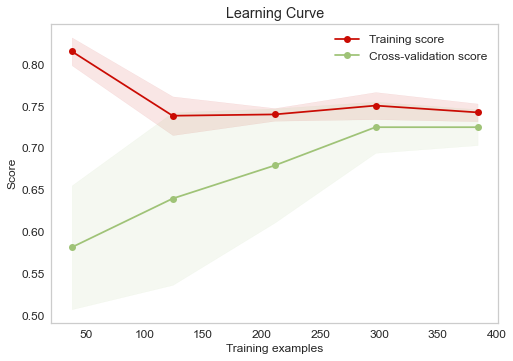

In [240]:
plot_learning_curve(pipeline_LR, X , y)
#this looks like a good model the train and the cross validation seems to be consistent in the end maybe the training score will go down 

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

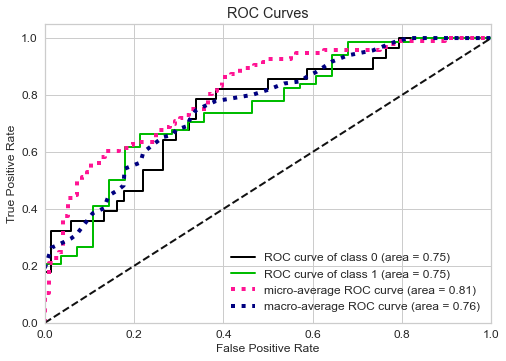

In [257]:
pipeline_LR.fit(X_train, y_train)
y_probas = pipeline_LR.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
#pretty good laybe doesn't go up enought but we are probably missing some data

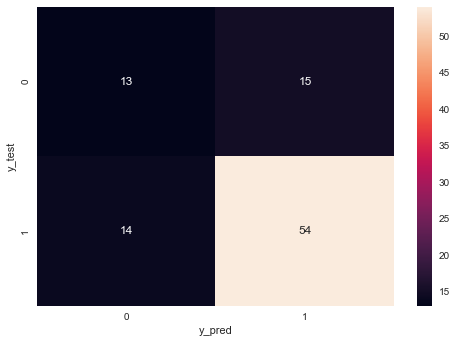

In [241]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
#we still need to reduce the false positive but it's a decent model 

# Second iteration = Logistic regression + StandardScaler

In [242]:
pipeline_LRSS= Pipeline(steps = [['standard scaler', preprocessing_ss],
                                    ['classiffier', LogisticRegression()]
                                     ])

In [243]:
pipeline_LRSS.fit(X_train , y_train)

Pipeline(steps=[('standard scaler',
                 Pipeline(steps=[('standard scaler', StandardScaler())])),
                ['classiffier', LogisticRegression()]])

In [244]:
print("accuracy train : %.3f"%pipeline_LRSS.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_LRSS.score(X_test , y_test))

accuracy train : 0.807
accuracy test : 0.823


In [245]:
y_pred_LRSS = pipeline_LRSS.predict(X_test)
y_pred_LRSS

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [246]:
print(classification_report(y_test, y_pred_LRSS))
#we can clearly see here a overfitting or underfitting because i have a perfect one so that model is not good !
#i will need to do a learning curve to define if it is overfitting or underfitting

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

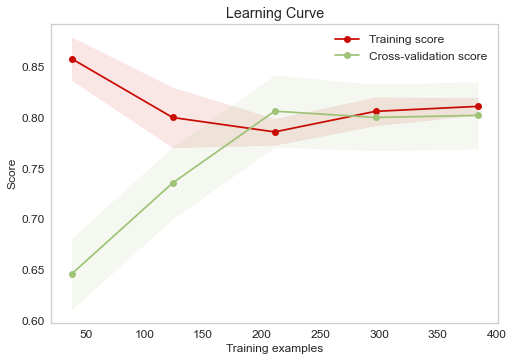

In [247]:
plot_learning_curve(pipeline_LRSS, X , y)
#so this is overfitting becausewe had a perfect one and we can see the train and cross validation are always going up 
#this model is a no

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

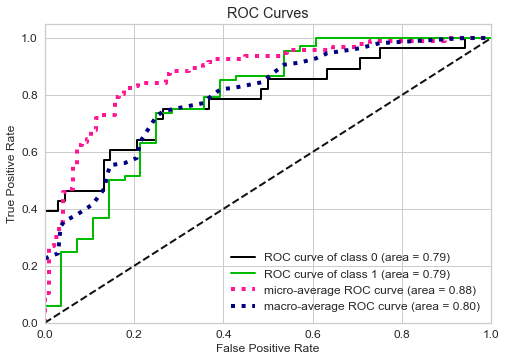

In [258]:
pipeline_LRSS.fit(X_train, y_train)
y_probas = pipeline_LRSS.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
#it's not bad it goes up quite fast but not enought and goes down quickly

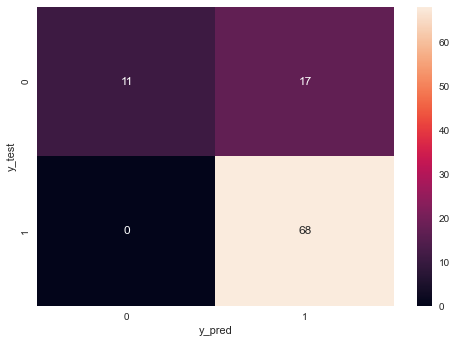

In [248]:
cm = confusion_matrix(y_test, y_pred_LRSS)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
#the false positive or going up so this is bad

# Third iteration = KNN + SMOTE

In [249]:
pipeline_KNNS= imbpipeline(steps = [['smote', preprocessing_sm],
                                    ['kneighborsclassiffier', KNeighborsClassifier()]
                                     ])

In [250]:
pipeline_KNNS.fit(X_train , y_train)

Pipeline(steps=[('smote', SMOTE()),
                ['kneighborsclassiffier', KNeighborsClassifier()]])

In [251]:
print("accuracy train : %.3f"%pipeline_KNNS.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_KNNS.score(X_test , y_test))

accuracy train : 0.737
accuracy test : 0.531


In [252]:
y_pred_KNNS = pipeline_KNNS.predict(X_test)

y_pred_KNNS

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0])

In [253]:
print(classification_report(y_test, y_pred_KNNS))
#the result of recall are really close and this really shouldn't happend

              precision    recall  f1-score   support

           0       0.27      0.36      0.31        28
           1       0.69      0.60      0.65        68

    accuracy                           0.53        96
   macro avg       0.48      0.48      0.48        96
weighted avg       0.57      0.53      0.55        96



<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

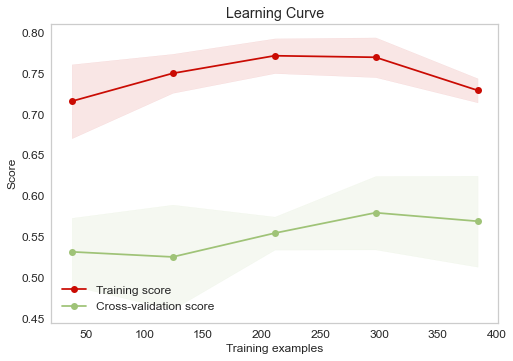

In [254]:
plot_learning_curve(pipeline_KNNS, X , y)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

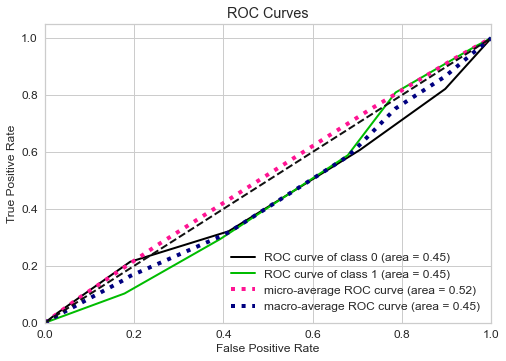

In [259]:
pipeline_KNNS.fit(X_train, y_train)
y_probas = pipeline_KNNS.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
#REALLY BAD it's going under the main straight line

In [255]:
#The space betweens the 2 lignes meens the error ratio, it's enormous ! Not a suprise thought !

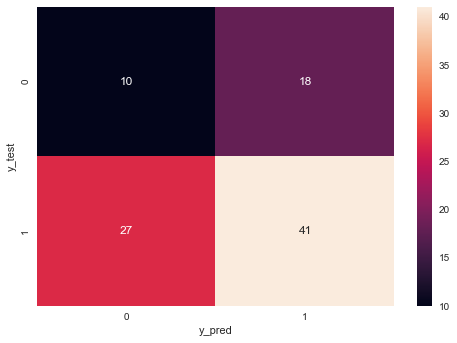

In [256]:
cm = confusion_matrix(y_test, y_pred_KNNS)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
#the false positive are up and the true positive are down worst model so far

# CONCLUSION : best model is the first iteration 